In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import pandas as pd # for data manipulation

## 1: Loading Data

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2: Visualisation

C:\Users\Max Tost\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


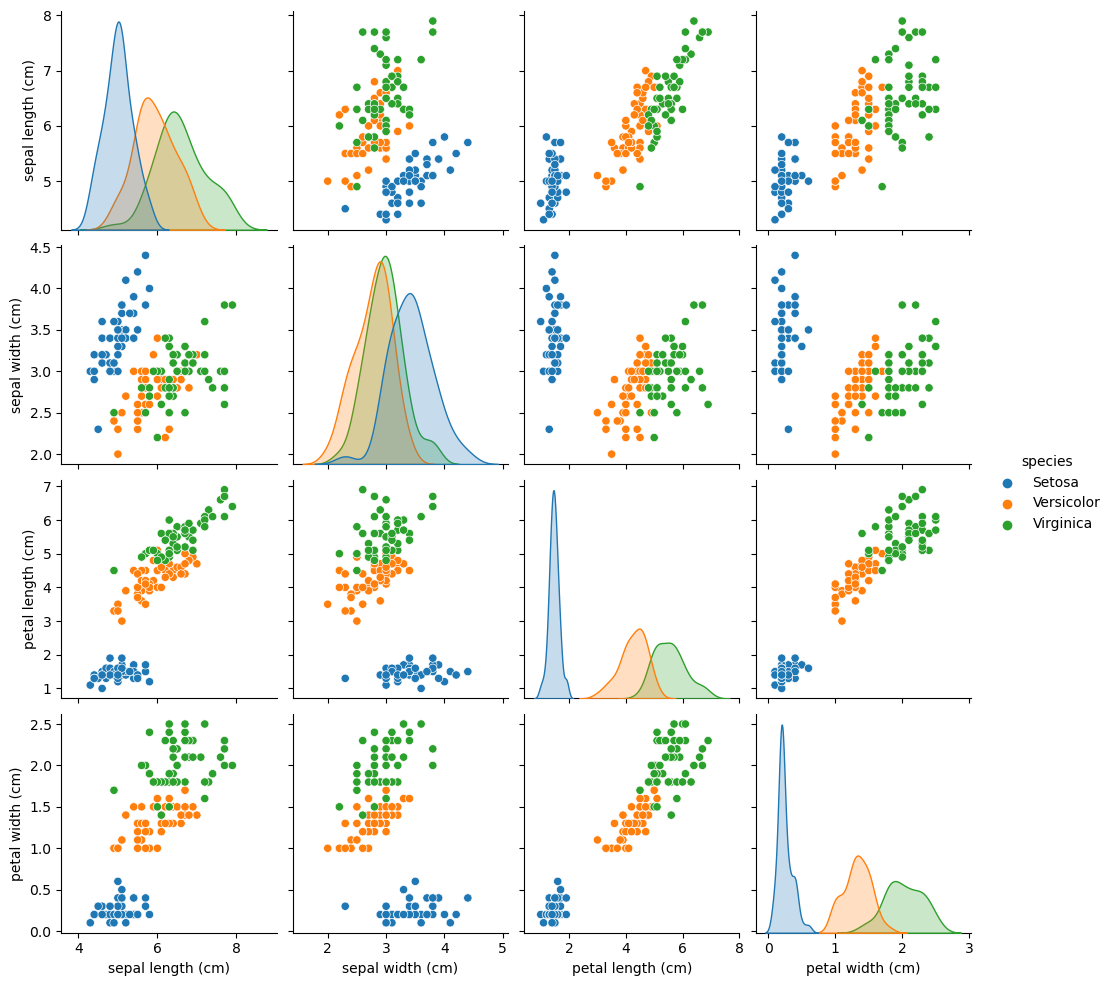

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
# Pair plot
sns.pairplot(data, hue='species', diag_kind='kde')
plt.show()


## 3: Convert Data into DMatrix
DMatrix is the Data Structure used by XGBost for optimal performance

In [4]:
# Convert the data into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

## 4: Define Hyperparameters

In [23]:
# Set parameters
params = {
    "objective": "multi:softmax",  # Multi-class classification
    "num_class": 3,               # Number of classes
    "eval_metric": "mlogloss",    # Evaluation metric
    "eta": 0.3,                   # Learning rate
    "max_depth": 4                # Maximum tree depth
}


## 5: Train the Model

In [24]:
num_rounds = 1
bst = xgb.train(params, dtrain, num_rounds)

## 6: Make predictions

In [25]:
# Predict on the test set
y_pred = bst.predict(dtest)

# Convert predictions to integers
y_pred = y_pred.astype(int)


## 7: Evaluate the Model

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00
